In [2]:
# Import all the necesary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,VotingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,classification_report

Initial Analysis:
1. Any missing values?

  No

2. Are there any categorical variables that should be one-hot encoded? What are the variables, and why is one-hot encoding appropriate for them?

  Yes, the Education column values, the City column values, the Gender column, and the EverBenched column values. One-hot encoding is appropriate for these column values because each Column has a limited # of values, hence no significant increase in computational complexity, and so that the computer can understand the string values in each column in numeric form. This type of encoding also shows that these column values are not comparable in the notion "one is greater than the other"

3. Are there any categorical variables that should be ordinal encoded, but are not currently encoded this way? What are the variables, and why is ordinal encoding appropriate for them?

  Yes, there are a few categorical variables that should be ordinal encoded, but they are already encoded this way.

4. Are there any continuous variables that should be scaled or standardized?

  No


# Load Data + read

In [5]:
# Read the dataset
dataframe= pd.read_csv("Employee.csv")

In [6]:
# Lets check the shape of the data
dataframe.shape

(4653, 9)

In [8]:
# Lets check the datatype of each columns
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [9]:
# Lets describe the dataset
dataframe.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [10]:
# To check Is there any null values in the dataset
dataframe.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [11]:
# To check Is there any duplicate value in the dataset
dataframe.duplicated().sum()

1889

In [13]:
# Remove the duplicate values in the dataset
dataframe.drop_duplicates(inplace=True)

In [14]:
# Shape of dataframe after removing the duplicate values
dataframe.shape

(2764, 9)

## categorical columns

In [15]:
dataframe["EverBenched"].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
dataframe["City"].unique()

array(['Bangalore', 'Pune', 'New Delhi'], dtype=object)

##Encoding

In [32]:
le=LabelEncoder()
dataframe["Education"]= le.fit_transform(dataframe["Education"])
dataframe["City"]=le.fit_transform(dataframe["City"])
dataframe["Gender"]=le.fit_transform(dataframe["Gender"])
dataframe["EverBenched"]=le.fit_transform(dataframe["EverBenched"])

## Refitting

In [33]:
# Lets Split the dataset
def train_test_split_data(dataframe, target, random_state, test_size):
    x_train,y_train,x_test,y_test= train_test_split(dataframe.drop([target], axis=1),
                                                    dataframe[target],
                                                    random_state=random_state,
                                                    test_size=0.3,
                                                    stratify=dataframe[target])
    return x_train, x_test, y_train,y_test

In [34]:
x_train, y_train, x_test, y_test=  train_test_split_data(dataframe, target="LeaveOrNot", random_state=42, test_size=0.3)

In [35]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1934, 8), (1934,), (830, 8), (830,))

In [36]:
# Lets balance the dataset using smote technique
sm= SMOTE(sampling_strategy="minority", random_state=42)
x_train_smote, y_train_smote= sm.fit_resample(x_train, y_train)

In [37]:
x_train_smote.shape, y_train_smote.shape

((2346, 8), (2346,))

##3 Learning Model Types

### Random forest classifier

RandomForestClassifier(max_features=3, min_samples_leaf=3, min_samples_split=10,
                       n_estimators=400)
----------------------
Accuracy:[0.7710843373493976]
F1-Score:[0.6885245901639344]
Precision:[0.6422018348623854]
Recall:[0.7420494699646644]
-------------------------------
Classifiaction Reoprt
-------------------------------
              precision    recall  f1-score   support

           0      0.786     0.855     0.819       503
           1      0.742     0.642     0.689       327

    accuracy                          0.771       830
   macro avg      0.764     0.749     0.754       830
weighted avg      0.769     0.771     0.768       830

Confusion_Matrix


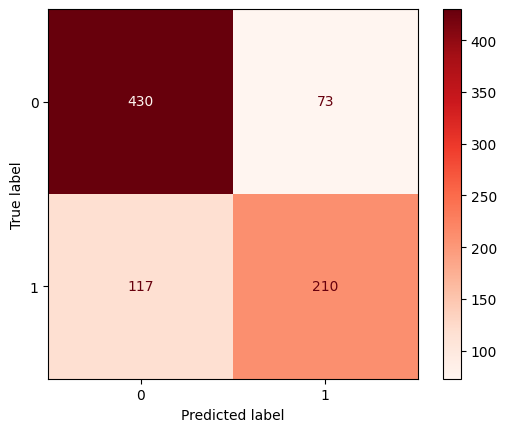

In [38]:
rf=RandomForestClassifier()

hyper_params = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "n_estimators":[100,300, 400, 500, 600],
                "criterion":["gini"]}

model=GridSearchCV(rf, hyper_params, cv=5, scoring="f1_macro", n_jobs=-1)
model.fit(x_train_smote,y_train_smote)
y_pred= model.predict(x_test)
print(model.best_estimator_)

print("----------------------")

accuracy_scores=[]
f1_scores=[]
precision_scores=[]
recall_scores=[]


accuracy_scores.append(accuracy_score(y_pred, y_test))
f1_scores.append(f1_score(y_pred, y_test))
precision_scores.append(precision_score(y_pred, y_test))
recall_scores.append(recall_score(y_pred, y_test))



# Print the Results
print(f"Accuracy:{accuracy_scores}")
print(f"F1-Score:{f1_scores}")
print(f"Precision:{precision_scores}")
print(f"Recall:{recall_scores}")

print("-------------------------------")
print("Classifiaction Reoprt")
print("-------------------------------")
print(classification_report(y_test,y_pred,digits=3))
print("Confusion_Matrix")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap="Reds")
plt.show()

##Gradient Boosting Classifier

GradientBoostingClassifier(min_samples_leaf=3)
Accuracy:[0.7867469879518072]
F1-Score:[0.7203791469194314]
Precision:[0.6972477064220184]
Recall:[0.7450980392156863]
-------------------------------
Classification Reoprt
-------------------------------
              precision    recall  f1-score   support

           0      0.811     0.845     0.828       503
           1      0.745     0.697     0.720       327

    accuracy                          0.787       830
   macro avg      0.778     0.771     0.774       830
weighted avg      0.785     0.787     0.785       830

Confusion_Matrix


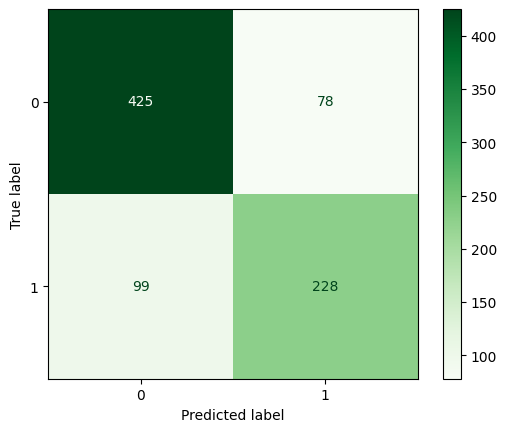

In [39]:
gbc_param_grid = {
                      "learning_rate": [0.05, 0.1, 0.02],
                      "n_estimators": [100,200,300,400,500],
                      "min_samples_split": [2,3,10],
                      "min_samples_leaf": [1,3,10]
                      }

gbc=GradientBoostingClassifier()
gbc_model= GridSearchCV(gbc, gbc_param_grid, cv=5, scoring="f1_macro", n_jobs=-1 )
gbc_model.fit(x_train_smote,y_train_smote)
y_pred= gbc_model.predict(x_test)
print(gbc_model.best_estimator_)

accuracy_scores=[]
f1_scores=[]
precision_scores=[]
recall_scores=[]


accuracy_scores.append(accuracy_score(y_pred, y_test))
f1_scores.append(f1_score(y_pred, y_test))
precision_scores.append(precision_score(y_pred, y_test))
recall_scores.append(recall_score(y_pred, y_test))



# Print the Results
print(f"Accuracy:{accuracy_scores}")
print(f"F1-Score:{f1_scores}")
print(f"Precision:{precision_scores}")
print(f"Recall:{recall_scores}")

print("-------------------------------")
print("Classification Reoprt")
print("-------------------------------")
print(classification_report(y_test,y_pred,digits=3))
print("Confusion_Matrix")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap="Greens")
plt.show()

## Voting Classifier

Accuracy:[0.7891566265060241]
F1-Score:[0.7217806041335454]
Precision:[0.6941896024464832]
Recall:[0.7516556291390728]
-------------------------------
Classifiaction Reoprt
-------------------------------
              precision    recall  f1-score   support

           0      0.811     0.851     0.830       503
           1      0.752     0.694     0.722       327

    accuracy                          0.789       830
   macro avg      0.781     0.773     0.776       830
weighted avg      0.787     0.789     0.788       830

Confusion_Matrix


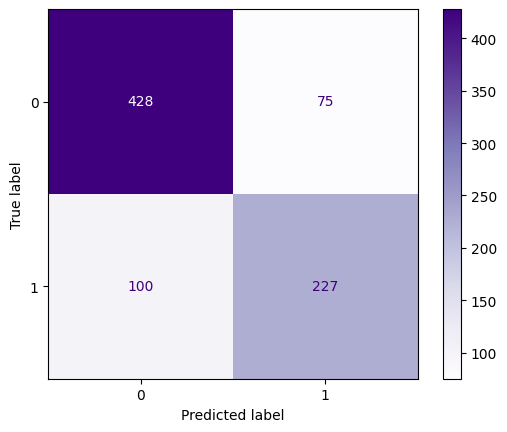

In [40]:
gbc=GradientBoostingClassifier()
gbc1=GradientBoostingClassifier(learning_rate=0.05, min_samples_split=3,n_estimators=500)
rf=RandomForestClassifier(max_features=3, min_samples_leaf=3, min_samples_split=3)


voting_model= VotingClassifier(estimators=[('gradient_bosting1', gbc),('gradient_bosting2', gbc), ('gradient_bosting3', gbc), ('gradient_bosting4',gbc),('gradient_bosting5',gbc)], voting='hard', n_jobs=-1)
voting_model.fit(x_train_smote, y_train_smote)
y_pred=voting_model.predict(x_test)


accuracy_scores=[]
f1_scores=[]
precision_scores=[]
recall_scores=[]


accuracy_scores.append(accuracy_score(y_pred, y_test))
f1_scores.append(f1_score(y_pred, y_test))
precision_scores.append(precision_score(y_pred, y_test))
recall_scores.append(recall_score(y_pred, y_test))



# Print the Results
print(f"Accuracy:{accuracy_scores}")
print(f"F1-Score:{f1_scores}")
print(f"Precision:{precision_scores}")
print(f"Recall:{recall_scores}")

print("-------------------------------")
print("Classifiaction Reoprt")
print("-------------------------------")
print(classification_report(y_test,y_pred,digits=3))
print("Confusion_Matrix")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap="Purples")
plt.show()

## Evaluation

The voting classifier worked best, even though it only had a 78% accuracy rate.